In [1]:
!pip install google-cloud-bigquery google-auth db-dtypes

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/239.0 kB ? eta -:--:--
   --------------------------------------  235.5/239.0 kB 14.1 MB/s eta 0:00:01
   ---------------------------------------- 239.0/239.0 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/195.5 kB ? eta -:--:--
   ---------------------------------------  194.6/195.5 kB ? eta -:--:--
   ---------------------------------------- 195.5/195.5 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   -------------------------------------- - 133.1/139.4 kB ? eta -:--:--
   ---------------------------------------- 139.4/139.4 kB 2.1 MB/s eta

In [3]:
from google.oauth2 import service_account
from google.cloud import bigquery

In [4]:
credentials = service_account.Credentials.from_service_account_file("./bigquery_key.json")

In [5]:
credentials

In [6]:
client = bigquery.Client(
    credentials = credentials,
    project=credentials.project_id,
)

In [7]:
client

In [9]:
sql = """
SELECT
  *
FROM 
  `ringed-dispatch-428804-m4.teamproject.drunk_result_month`
ORDER BY
  month
;
"""

In [10]:
df_1 = client.query(sql).to_dataframe()

C:\Users\dowb1\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [11]:
df_1_index = df_1.set_index("month")

In [12]:
df_1_drop = df_1_index.drop(["All_count"], axis=0)

In [13]:
df_1_drop2 = df_1.drop([0], axis=0)

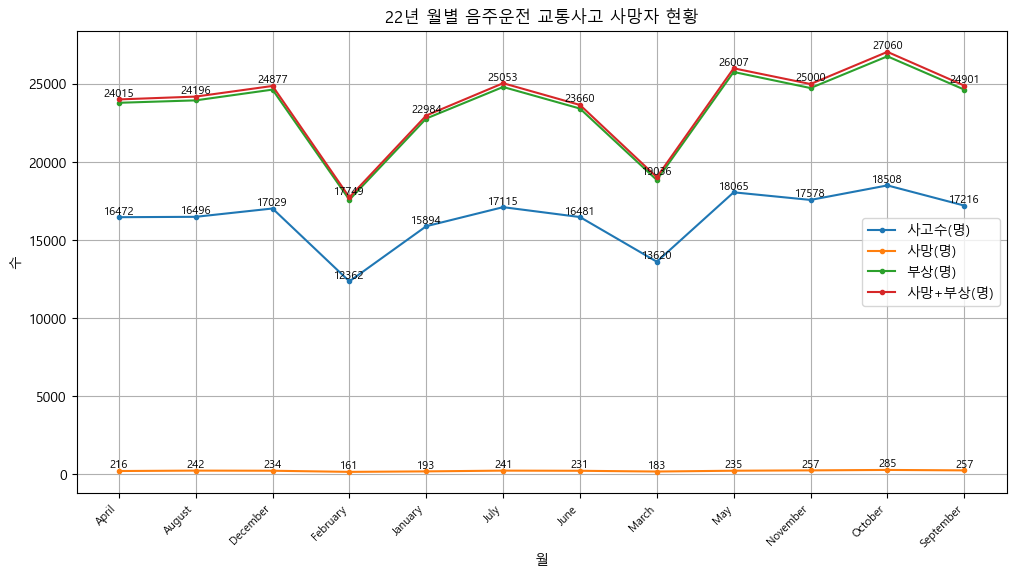

In [14]:

# 참고자료 : 통계청 가해자_음주정도별_주야별_교통사고_20240709111523
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
# AppleGothic
# Malgun Gothic
plt.rc("font", family="Malgun Gothic")


plt.figure(figsize=(12,6))
plt.title("22년 월별 음주운전 교통사고 사망자 현황")
plt.xlabel("월")
plt.ylabel("수")
plt.plot(df_1_drop["count_of_accident"], label="사고수(명)", marker="o", markersize=3)
plt.plot(df_1_drop["sum_of_death"], label="사망(명)",  marker="o", markersize=3)
plt.plot(df_1_drop["sum_of_injury"], label="부상(명)",  marker="o", markersize=3)
plt.plot(df_1_drop["sum_of_all"], label="사망+부상(명)", marker="o", markersize=3)
plt.legend()
_ = plt.xticks(size = 8, rotation=45, ha="right")

plt.grid(True)

x1 = df_1_drop2["month"].tolist()
y1 = df_1_drop2["count_of_accident"].tolist()
for i in range(len(x1)):
    height = y1[i]
    plt.text(x1[i], height + 0.25, '%i' %height, ha='center', va='bottom', size = 8)


x2 = df_1_drop2["month"].tolist()
y2 = df_1_drop2["sum_of_death"].tolist()
for i in range(len(x2)):
    height = y2[i]
    plt.text(x2[i], height + 0.25, '%i' %height, ha='center', va='bottom', size = 8)

# x3 = df_1_drop2["month"].tolist()
# y3 = df_1_drop2["sum_of_injury"].tolist()
# for i in range(len(x3)):
#     height = y3[i]
#     plt.text(x3[i], height + 0.25, '%i' %height, ha='center', va='bottom', size = 8)

x4 = df_1_drop2["month"].tolist()
y4 = df_1_drop2["sum_of_all"].tolist()
for i in range(len(x4)):
    height = y4[i]
    plt.text(x4[i], height + 0.25, '%i' %height, ha='center', va='bottom', size = 8)

In [7]:
sql2 = """
SELECT * FROM `ringed-dispatch-428804-m4.teamproject.drunk_result_hour` ORDER BY Time;
"""

In [8]:
df_2 = client.query(sql2).to_dataframe()

C:\Users\dowb1\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [9]:
df_2_index = df_2.set_index("Time")

In [10]:
df_2_drop = df_2_index.drop(['sum'], axis=0)

In [11]:
df_2_drop2 = df_2.drop([12], axis=0)

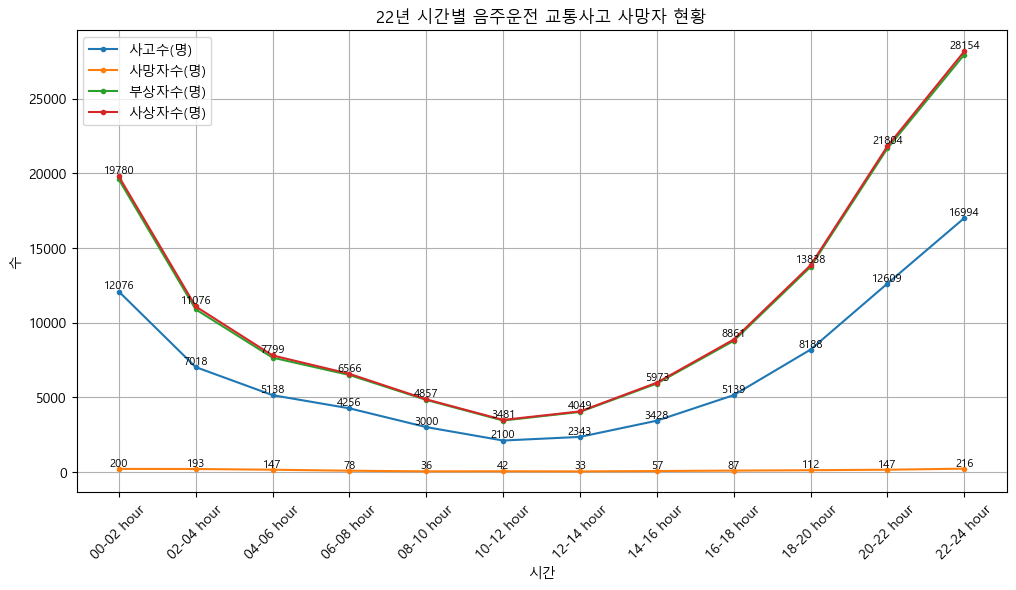

In [12]:
# 참고자료 : 도로교통공단 https://www.koroad.or.kr/main/board/6/88316/board_view.do 
from matplotlib import pyplot as plt

from matplotlib import font_manager, rc
# AppleGothic
# Malgun Gothic
plt.rc("font", family="Malgun Gothic")


plt.figure(figsize=(12,6))
plt.title("22년 시간별 음주운전 교통사고 사망자 현황")
plt.xlabel("시간")
plt.ylabel("수")
plt.plot(df_2_drop["count_of_accdient"], label="사고수(명)", marker="o", markersize=3)
plt.plot(df_2_drop["sum_of_death"], label="사망자수(명)",  marker="o", markersize=3)
plt.plot(df_2_drop["sum_of_injury"], label="부상자수(명)",  marker="o", markersize=3)
plt.plot(df_2_drop["sum_of_all"], label="사상자수(명)", marker="o", markersize=3)
plt.legend()
_ = plt.xticks(size = 10, rotation=45, ha="center")

plt.grid(True)

x1 = df_2_drop2["Time"].tolist()
y1 = df_2_drop2["count_of_accdient"].tolist()
for i in range(len(x1)):
    height = y1[i]
    plt.text(x1[i], height + 0.25, '%i' %height, ha='center', va='bottom', size = 8)


x2 = df_2_drop2["Time"].tolist()
y2 = df_2_drop2["sum_of_death"].tolist()
for i in range(len(x2)):
    height = y2[i]
    plt.text(x2[i], height + 0.25, '%i' %height, ha='center', va='bottom', size = 8)

# x3 = df_2_drop2["Time"].tolist()
# y3 = df_2_drop2["sum_of_injury"].tolist()
# for i in range(len(x3)):
#     height = y3[i]
#     plt.text(x3[i], height + 0.25, '%i' %height, ha='center', va='bottom', size = 8)

x4 = df_2_drop2["Time"].tolist()
y4 = df_2_drop2["sum_of_all"].tolist()
for i in range(len(x4)):
    height = y4[i]
    plt.text(x4[i], height + 0.25, '%i' %height, ha='center', va='bottom', size = 8)

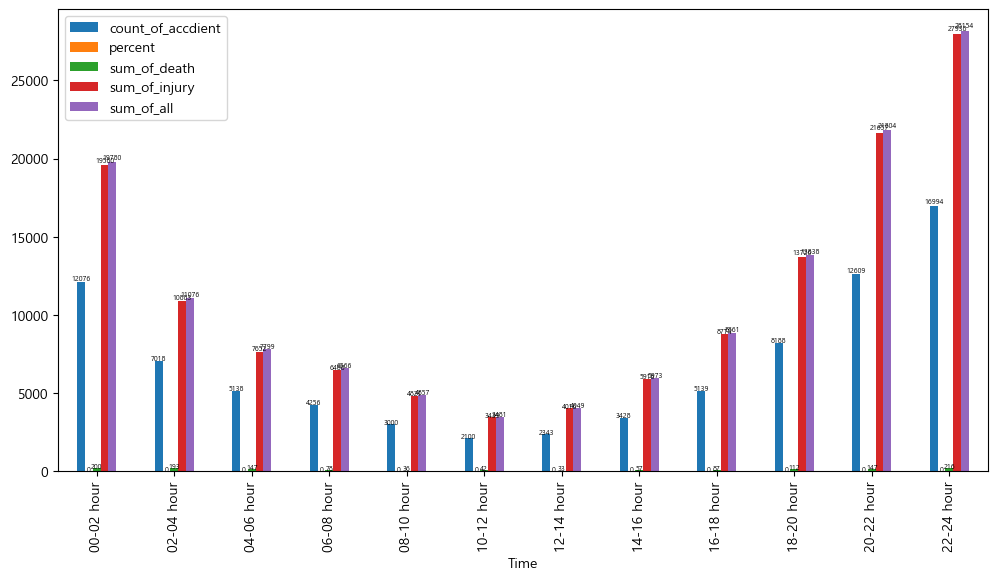

In [13]:
ax = df_2_drop.plot(
    kind="bar",
    figsize=(12, 6)
)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    # print(p.get_bbox().bounds)
    ax.annotate("%i"%(height), (left+width/2, height*1.01), ha='center', size=5)

In [14]:
# 시간대별로는 저녁 6시부터 다음날 새벽 4시 사이에 평균(건)보다 높게 발생하며 자정을 전후로 가장 많아 대중교통이 끊긴 시간대라도 절대 운전대를 잡아서는 안 된다.
# 야간에 비해 사고건수는 적지만 낮 시간 음주운전과 술 마신 다음날 아침에 숙취 상태로 운전하다 발생하는 교통사고도 끊이지 않고 있어, 술을 마신 날은 물론 다음날에도 술이 완전히 깨기 전에는 절대 운전을 하지 않아야 한다.

In [15]:
sql3 = """
SELECT * FROM `ringed-dispatch-428804-m4.teamproject.drunk_result_year` ORDER BY year;
"""

In [16]:
df_3 = client.query(sql3).to_dataframe()

C:\Users\dowb1\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [17]:
df_3_index = df_3.set_index("year")

In [18]:
df_3_drop = df_3_index.drop(['all_drunk_accident_share', 'all_drunk_death_share', 'all_drunk_injury_share'], axis=1)

In [24]:
df_3_drop2 = df_3.drop(['all_drunk_accident_share', 'all_drunk_death_share', 'all_drunk_injury_share'], axis=1)

In [20]:
df_3_drop2.to_csv("./accident_of_year.csv")

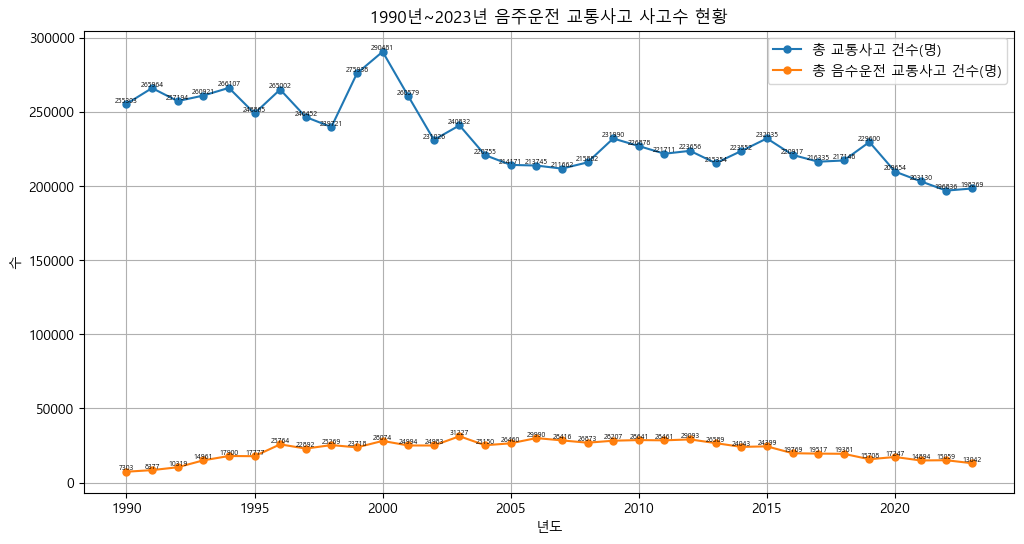

In [28]:
# 참고자료 : 도로교통공단 https://www.koroad.or.kr/main/board/6/88316/board_view.do 
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
# AppleGothic
# Malgun Gothic
plt.rc("font", family="Malgun Gothic")

plt.figure(figsize=(12,6))
plt.title("1990년~2023년 음주운전 교통사고 사고수 현황")
plt.xlabel("년도")
plt.ylabel("수")
plt.plot(df_3_drop["all_accident"], label="총 교통사고 건수(명)", marker="o", markersize=5)
plt.plot(df_3_drop["all_drunk_accident"], label="총 음수운전 교통사고 건수(명)",  marker="o", markersize=5)
plt.legend()
_ = plt.xticks(size = 10, rotation=0, ha="center")

plt.grid(True)

x1 = df_3_drop2["year"].tolist()
y1 = df_3_drop2["all_accident"].tolist()
for i in range(len(x1)):
    height = y1[i]
    plt.text(x1[i], height + 0.25, '%i' %height, ha='center', va='bottom', size = 5)


x2 = df_3_drop2["year"].tolist()
y2 = df_3_drop2["all_drunk_accident"].tolist()
for i in range(len(x2)):
    height = y2[i]
    plt.text(x2[i], height + 0.25, '%i' %height, ha='center', va='bottom', size = 5)

In [29]:
sql4 = """
SELECT * FROM `ringed-dispatch-428804-m4.teamproject.traffic accident`;
"""

In [30]:
df_4 = client.query(sql4).to_dataframe()

C:\Users\dowb1\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [31]:
df_4_drop = df_4[df_4['Year'] == 2023][['Area state', 'Dead', 'Injuries Dead']]

In [32]:
df_4_drop.columns = ['지역', '사망자수', '사상자수']

In [33]:
df_4_groupby = df_4_drop.groupby(['지역'])

In [34]:
df_4_sum = df_4_groupby[['사망자수', '사상자수']].sum()

In [44]:
df_4_sort = df_4_sum.sort_values('사망자수', ascending = False)

In [45]:
df_4_transpose = df_4_sort.transpose()

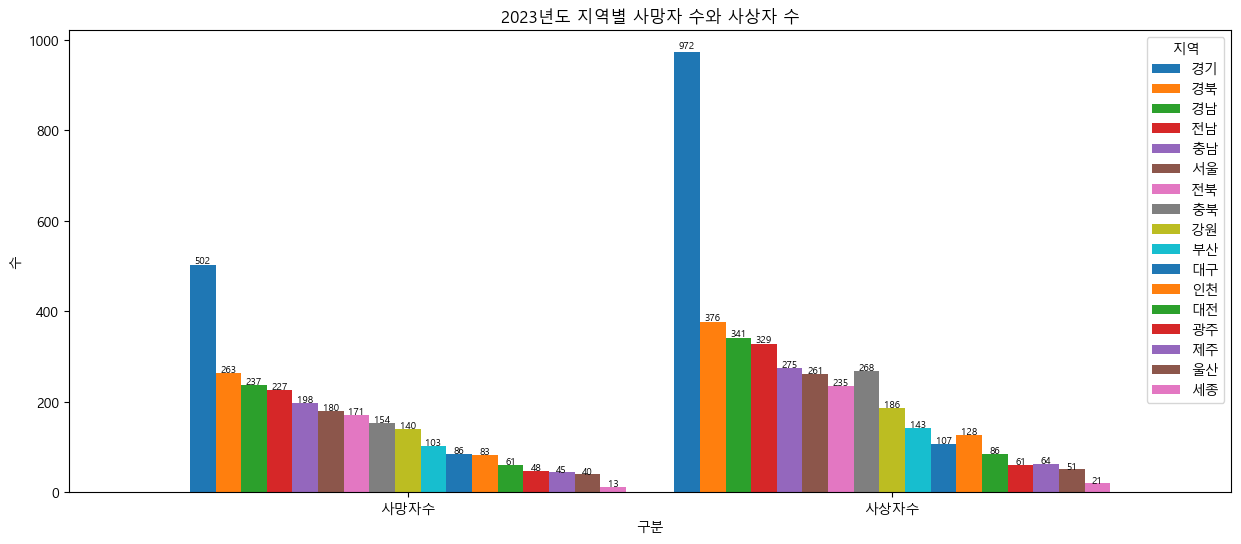

In [51]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
# AppleGothic
# Malgun Gothic
plt.rc("font", family="Malgun Gothic")

ax = df_4_transpose.plot(    
    kind="bar",
    title="2023년도 지역별 사망자 수와 사상자 수",
    figsize=(15, 6),
    width = 0.9, 
)
_ = plt.xticks(size = 10, rotation=0, ha="center")

plt.xlabel("구분")
plt.ylabel("수")

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    # print(p.get_bbox().bounds)
    ax.annotate("%i"%(height), (left+width/2, height*1.01), ha='center', size=7)

In [37]:
df_4_drop_2022 = df_4[df_4['Year'] == 2022][['Area state', 'Dead', 'Injuries Dead']]

In [38]:
df_4_drop_2022.columns = ['지역', '사망자수', '사상자수']

In [39]:
df_4_groupby_2022 = df_4_drop_2022.groupby(['지역'])

In [40]:
df_4_sum_2022 = df_4_groupby_2022[['사망자수', '사상자수']].sum()

In [41]:
df_4_sort_2022 = df_4_sum_2022.sort_values('사망자수', ascending = False)

In [42]:
df_4_transpose_2022 = df_4_sort_2022.transpose()

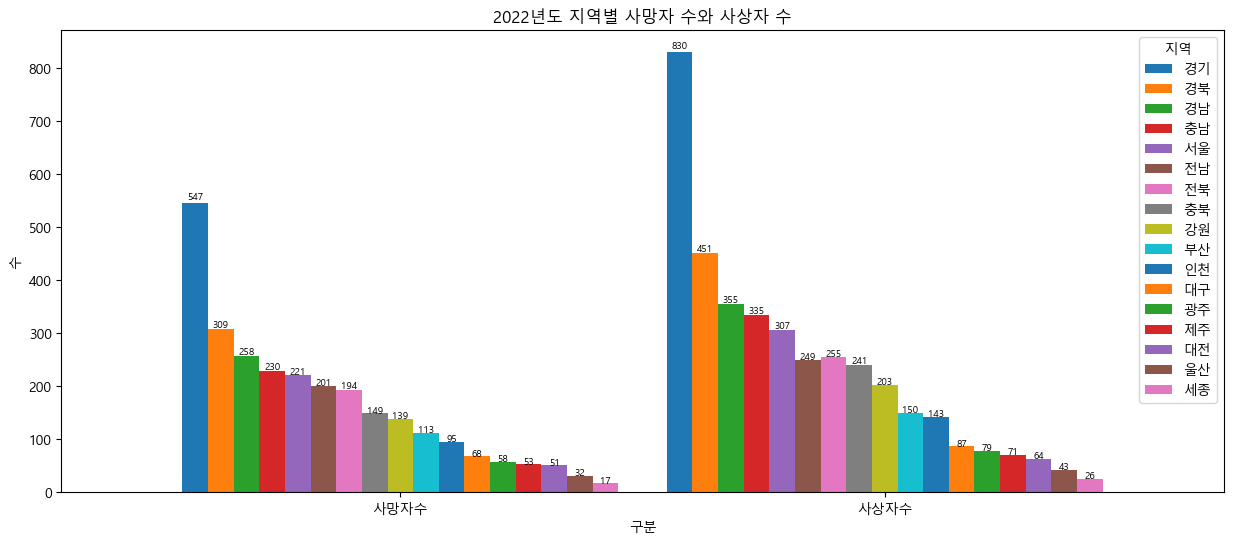

In [50]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
# AppleGothic
# Malgun Gothic
plt.rc("font", family="Malgun Gothic")

ax = df_4_transpose_2022.plot(    
    kind="bar",
    title="2022년도 지역별 사망자 수와 사상자 수",
    figsize=(15, 6),
    width = 0.9
)
_ = plt.xticks(size = 10, rotation=0, ha="center")

plt.xlabel("구분")
plt.ylabel("수")

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    # print(p.get_bbox().bounds)
    ax.annotate("%i"%(height), (left+width/2, height*1.01), ha='center', size=7)

In [49]:
sql5 = """
SELECT * FROM `ringed-dispatch-428804-m4.teamproject.drunk_result_week`;
"""

In [50]:
df_5 = client.query(sql5).to_dataframe()

C:\Users\dowb1\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [51]:
df_5_drop_2021 = df_5[df_5['year'] == 2021]

In [52]:
df_5_drop2_2021 = df_5_drop_2021.drop(labels=30,axis=0)

In [53]:
df_5_drop3_2021 = df_5_drop2_2021.drop(labels='year',axis=1)

In [54]:
df_5_drop4_2021 = df_5_drop3_2021.drop(labels='division',axis=1)

In [55]:
df_5_drop5_2021 = df_5_drop4_2021.drop(labels='all_count',axis=1)

In [56]:
df_5_drop5_2021.columns = ['일', '월', '화', '수', '목', '금', '토']

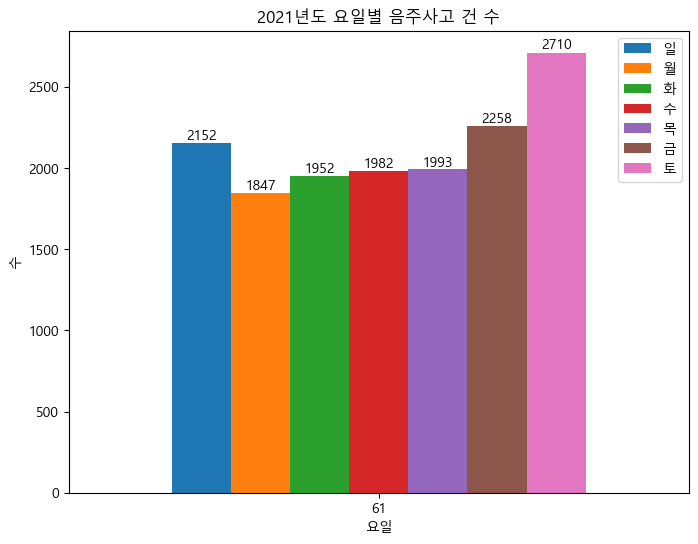

In [67]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
# AppleGothic
# Malgun Gothic
plt.rc("font", family="Malgun Gothic")
# plt.title("2023년도 지역별 사망자 수와 사상자 수")
ax = df_5_drop5_2021.plot(    
    kind="bar",
    title="2021년도 요일별 음주사고 건 수",
    figsize=(8, 6),
    width = 1
)
_ = plt.xticks(size = 10, rotation=0, ha="center")

plt.xlabel("요일")
plt.ylabel("수")

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    # print(p.get_bbox().bounds)
    ax.annotate("%i"%(height), (left+width/2, height*1.01), ha='center', size=10)

In [68]:
df_5_drop_2020 = df_5[df_5['year'] == 2020]

In [69]:
df_5_drop2_2020 = df_5_drop_2020.drop(labels=29,axis=0)

In [70]:
df_5_drop3_2020 = df_5_drop2_2020[['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']]

In [71]:
df_5_drop3_2020.columns = ['일','월','화','수','목','금','토']

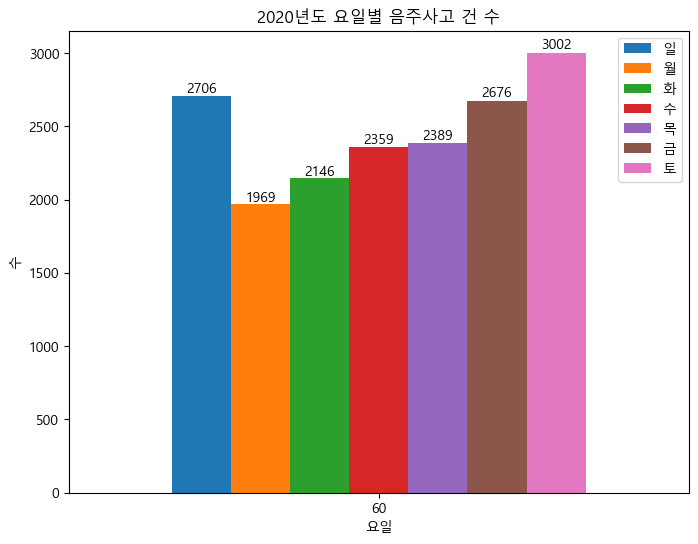

In [72]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
# AppleGothic
# Malgun Gothic
plt.rc("font", family="Malgun Gothic")
# plt.title("2023년도 지역별 사망자 수와 사상자 수")
ax = df_5_drop3_2020.plot(    
    kind="bar",
    title="2020년도 요일별 음주사고 건 수",
    figsize=(8, 6),
    width = 1
)
_ = plt.xticks(size = 10, rotation=0, ha="center")

plt.xlabel("요일")
plt.ylabel("수")

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    # print(p.get_bbox().bounds)
    ax.annotate("%i"%(height), (left+width/2, height*1.01), ha='center', size=10)

In [6]:
sql6 = """
SELECT * FROM `ringed-dispatch-428804-m4.teamproject.old_age_accident2`;
"""

In [7]:
df_6 = client.query(sql6).to_dataframe()

C:\Users\dowb1\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [8]:
df_6_drop = df_6[['year','all_deaths_count','old_deaths_count']]

In [9]:
df_6_setindex = df_6_drop.set_index('year')

In [10]:
df_6_setindex

,all_deaths_count,old_deaths_count
year,,
2010,5503,547
2011,5229,605
2012,5392,718
2013,5092,737
2014,4762,763
2015,4621,815
2016,4292,759
2017,4185,848
2018,3781,843


In [60]:
# year	all_accident_count	all_deaths_count	all_injured_count	all_deaths_and_injured_sum	old_accident_count	old_deaths_count	old_injured_count	old_deaths_and_injured_sum

df_6_drop2 = df_6.drop(['all_deaths_count', 'all_injured_count', 'all_deaths_and_injured_sum', 'old_deaths_count', 'old_injured_count',	'old_deaths_and_injured_sum'], axis=1)

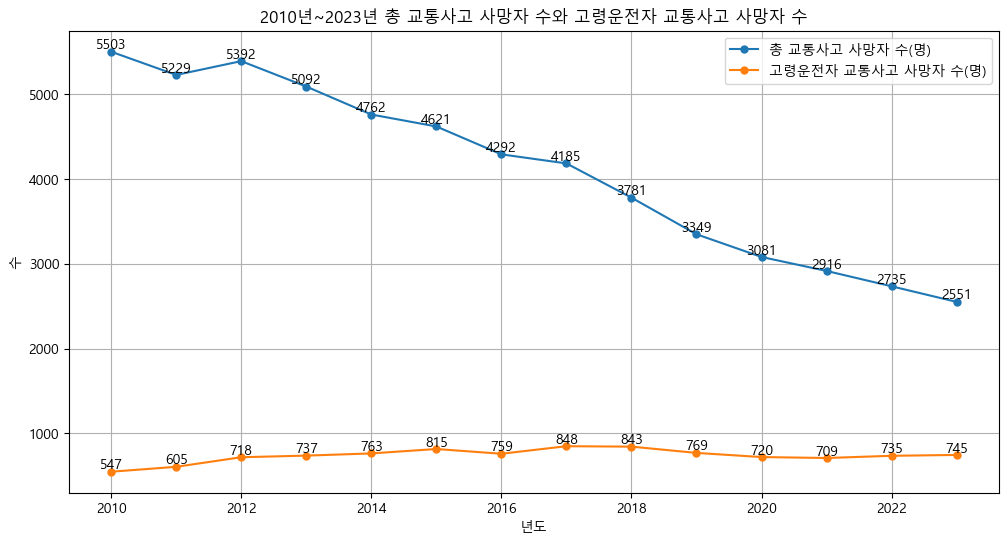

In [409]:
 
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
# AppleGothic
# Malgun Gothic
plt.rc("font", family="Malgun Gothic")

plt.figure(figsize=(12,6))
plt.title("2010년~2023년 총 교통사고 사망자 수와 고령운전자 교통사고 사망자 수")
plt.xlabel("년도")
plt.ylabel("수")
plt.plot(df_6_setindex["all_deaths_count"], label="총 교통사고 사망자 수(명)", marker="o", markersize=5)
plt.plot(df_6_setindex["old_deaths_count"], label="고령운전자 교통사고 사망자 수(명)",  marker="o", markersize=5)
plt.legend()
_ = plt.xticks(size = 10, rotation=0, ha="center")

plt.grid(True)

x1 = df_6_drop["year"].tolist()
y1 = df_6_drop["all_deaths_count"].tolist()
for i in range(len(x1)):
    height = y1[i]
    plt.text(x1[i], height + 0.25, '%i' %height, ha='center', va='bottom', size = 10)


x2 = df_6_drop["year"].tolist()
y2 = df_6_drop["old_deaths_count"].tolist()
for i in range(len(x2)):
    height = y2[i]
    plt.text(x2[i], height + 0.25, '%i' %height, ha='center', va='bottom', size = 10)

In [53]:
df_6_setindex

,all_accident_count,all_deaths_count,all_injured_count,all_deaths_and_injured_sum,old_accident_count,old_deaths_count,old_injured_count,old_deaths_and_injured_sum
year,,,,,,,,
2010,226878,5503,352458,357961,12623,547,18660,19207
2011,221711,5229,341391,346620,13596,605,19814,20419
2012,223656,5392,344565,349957,15190,718,22043,22761
2013,215354,5092,328711,333803,17590,737,25734,26471
2014,223552,4762,337497,342259,20275,763,29420,30183
2015,232035,4621,350400,355021,23063,815,33787,34602
2016,220917,4292,331720,336012,24429,759,35687,36446
2017,216335,4185,322829,327014,26713,848,38627,39475
2018,217148,3781,323037,326818,30012,843,43469,44312


In [24]:
df_6_drop_di = df_6[['year', 'all_deaths_count', 'all_deaths_and_injured_sum', 'old_deaths_count', 'old_deaths_and_injured_sum']]

In [25]:
df_6_setindex = df_6_drop_di.set_index('year')

In [27]:
df_6_setindex.columns = [['총 교통사고 사망자수', '총 교통사고 사상자수', '고령운전자 교통사고 사망자수', '고령운전자 교통사고 사상자수']]

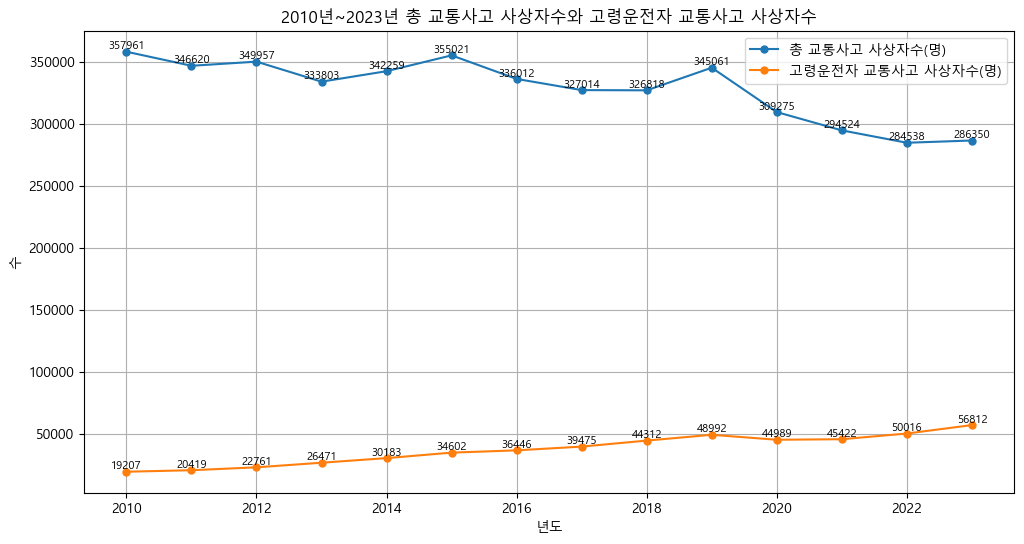

In [31]:
 
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
# AppleGothic
# Malgun Gothic
plt.rc("font", family="Malgun Gothic")

plt.figure(figsize=(12,6))
plt.title("2010년~2023년 총 교통사고 사상자수와 고령운전자 교통사고 사상자수")
plt.xlabel("년도")
plt.ylabel("수")
# plt.plot(df_6_drop_di["총 교통사고 사망자수"], label="총 교통사고 사망자수(명)", marker="o", markersize=5)
plt.plot(df_6_setindex["총 교통사고 사상자수"], label="총 교통사고 사상자수(명)",  marker="o", markersize=5)
# plt.plot(df_6_drop_di["고령운전자 교통사고 사망자수"], label="고령운전자 교통사고 사망자수(명)", marker="o", markersize=5)
plt.plot(df_6_setindex["고령운전자 교통사고 사상자수"], label="고령운전자 교통사고 사상자수(명)",  marker="o", markersize=5)
plt.legend()
_ = plt.xticks(size = 10, rotation=0, ha="center")

plt.grid(True)

x1 = df_6_drop_di["year"].tolist()
y1 = df_6_drop_di["all_deaths_and_injured_sum"].tolist()
for i in range(len(x1)):
    height = y1[i]
    plt.text(x1[i], height + 0.25, '%i' %height, ha='center', va='bottom', size = 8)


x2 = df_6_drop_di["year"].tolist()
y2 = df_6_drop_di["old_deaths_and_injured_sum"].tolist()
for i in range(len(x2)):
    height = y2[i]
    plt.text(x2[i], height + 0.25, '%i' %height, ha='center', va='bottom', size = 8)

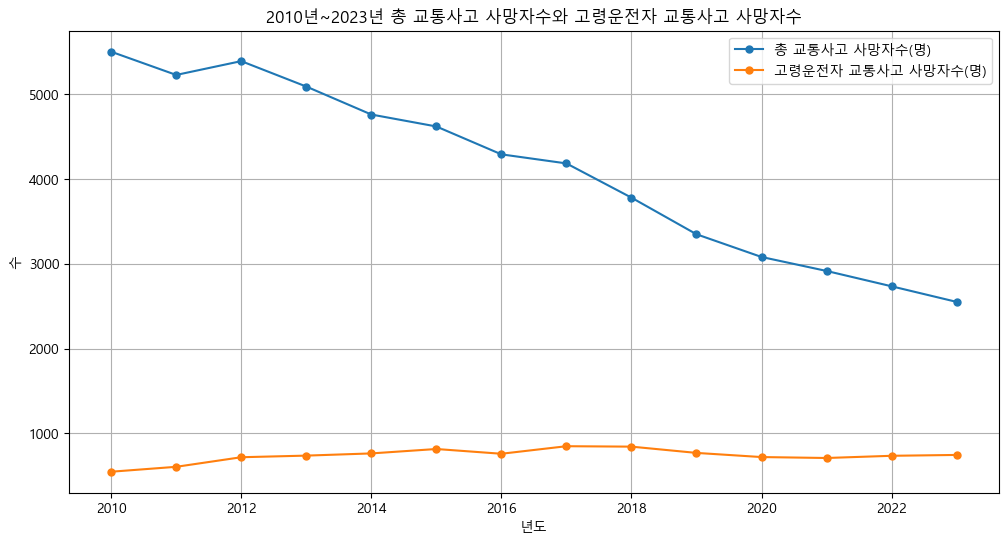

In [66]:
 
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
# AppleGothic
# Malgun Gothic
plt.rc("font", family="Malgun Gothic")

plt.figure(figsize=(12,6))
plt.title("2010년~2023년 총 교통사고 사망자수와 고령운전자 교통사고 사망자수")
plt.xlabel("년도")
plt.ylabel("수")
plt.plot(df_6_drop_di["총 교통사고 사망자수"], label="총 교통사고 사망자수(명)", marker="o", markersize=5)
# plt.plot(df_6_drop_di["총 교통사고 사상자수"], label="총 교통사고 사상자수(명)",  marker="o", markersize=5)
plt.plot(df_6_drop_di["고령운전자 교통사고 사망자수"], label="고령운전자 교통사고 사망자수(명)", marker="o", markersize=5)
# plt.plot(df_6_drop_di["고령운전자 교통사고 사상자수"], label="고령운전자 교통사고 사상자수(명)",  marker="o", markersize=5)
plt.legend()
_ = plt.xticks(size = 10, rotation=0, ha="center")

plt.grid(True)

# x1 = df_6_drop2["year"].tolist()
# y1 = df_6_drop2["all_accident_count"].tolist()
# for i in range(len(x1)):
#     height = y1[i]
#     plt.text(x1[i], height + 0.25, '%i' %height, ha='center', va='bottom', size = 5)


# x2 = df_6_drop2["year"].tolist()
# y2 = df_6_drop2["old_accident_count"].tolist()
# for i in range(len(x2)):
#     height = y2[i]
#     plt.text(x2[i], height + 0.25, '%i' %height, ha='center', va='bottom', size = 5)

In [71]:
sql7 = """
SELECT * FROM `ringed-dispatch-428804-m4.teamproject.Traffic_accident_status_by_region_total_for_elderly drivers`;
"""

In [72]:
df_7 = client.query(sql7).to_dataframe()

C:\Users\dowb1\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [74]:
df_7_seoul = df_7[df_7['지역: 시-도'] == '서울']

In [77]:
df_7_drop = df_7_seoul.drop(["지역: 시-도"], axis=1)

In [118]:
df_7_setindex = df_7_drop.set_index("사고 건수-사망자 수- 부상자 수")

In [119]:
df_7_transpose = df_7_drop.transpose()

In [120]:
sql8 = """
SELECT * FROM `ringed-dispatch-428804-m4.teamproject.rain_all_seoul_year`;
"""

In [121]:
df_8 = client.query(sql8).to_dataframe()

C:\Users\dowb1\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [122]:
df_8_seoul = df_8[df_8['area'] == 'seoul']

In [123]:
df_8_drop = df_8_seoul.iloc[12:]

In [124]:
df_8_setindex = df_8_drop.set_index('year')

In [125]:
df_8_drop2 = df_8_setindex.drop(['area'], axis=1)

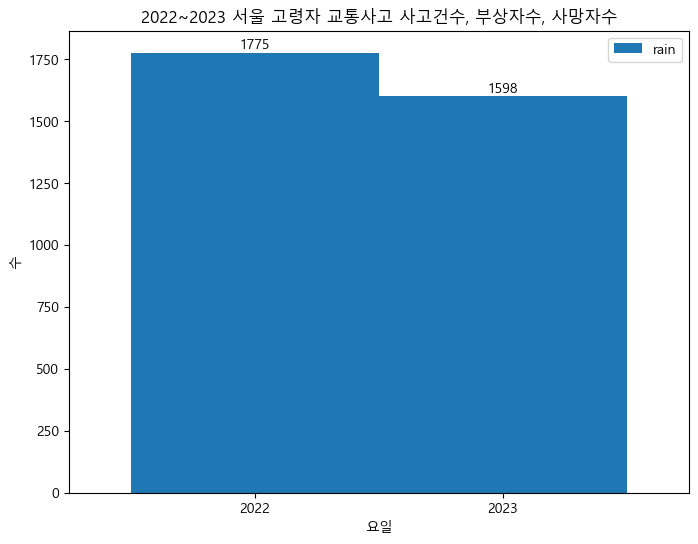

In [128]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
# AppleGothic
# Malgun Gothic
plt.rc("font", family="Malgun Gothic")

ax = df_8_drop2.plot(    
    kind="bar",
    title="2022~2023 서울 고령자 교통사고 사고건수, 부상자수, 사망자수",
    figsize=(8, 6),
    width = 1
)
_ = plt.xticks(size = 10, rotation=0, ha="center")

plt.xlabel("요일")
plt.ylabel("수")

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    # print(p.get_bbox().bounds)
    ax.annotate("%i"%(height), (left+width/2, height*1.01), ha='center', size=10)

In [8]:
sql9 = """
SELECT * FROM `ringed-dispatch-428804-m4.teamproject.area_accident`;
"""

In [9]:
df_9 = client.query(sql9).to_dataframe()

C:\Users\dowb1\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [10]:
df_9_drop_2010 = df_9.drop(["string_field_3", "string_field_4", "string_field_5", "string_field_6", "string_field_7", "string_field_8", "string_field_10"], axis=1)

In [11]:
df_9_drop_2011 = df_9_drop_2010.drop(["string_field_11", "string_field_12", "string_field_13", "string_field_14", "string_field_15", "string_field_16", "string_field_18"], axis=1)

In [12]:
df_9_drop_2012 = df_9_drop_2011.drop(["string_field_19", "string_field_20", "string_field_21", "string_field_22", "string_field_23", "string_field_24", "string_field_26"], axis=1)

In [13]:
df_9_drop_2013 = df_9_drop_2012.drop(["string_field_27", "string_field_28", "string_field_29", "string_field_30", "string_field_31", "string_field_32", "string_field_34"], axis=1)

In [14]:
df_9_drop_2014 = df_9_drop_2013.drop(["string_field_35", "string_field_36", "string_field_37", "string_field_38", "string_field_39", "string_field_40", "string_field_42"], axis=1)

In [15]:
df_9_drop_2015 = df_9_drop_2014.drop(["string_field_43", "string_field_44", "string_field_45", "string_field_46", "string_field_47", "string_field_48", "string_field_50"], axis=1)

In [16]:
df_9_drop_2016 = df_9_drop_2015.drop(["string_field_51", "string_field_52", "string_field_53", "string_field_54", "string_field_55", "string_field_56", "string_field_58"], axis=1)

In [17]:
df_9_drop_2017 = df_9_drop_2016.drop(["string_field_59", "string_field_60", "string_field_61", "string_field_62", "string_field_63", "string_field_64", "string_field_66"], axis=1)

In [18]:
df_9_drop_2018 = df_9_drop_2017.drop(["string_field_67", "string_field_68", "string_field_69", "string_field_70", "string_field_71", "string_field_72", "string_field_74"], axis=1)

In [19]:
df_9_drop_2019 = df_9_drop_2018.drop(["string_field_75", "string_field_76", "string_field_77", "string_field_78", "string_field_79", "string_field_80", "string_field_82"], axis=1)

In [20]:
df_9_drop_2020 = df_9_drop_2019.drop(["string_field_83", "string_field_84", "string_field_85", "string_field_86", "string_field_87", "string_field_88", "string_field_90"], axis=1)

In [21]:
df_9_drop_2021 = df_9_drop_2020.drop(["string_field_91", "string_field_92", "string_field_93", "string_field_94", "string_field_95", "string_field_96", "string_field_98"], axis=1)

In [22]:
df_9_drop_2022 = df_9_drop_2021.drop(["string_field_99", "string_field_100", "string_field_101", "string_field_102", "string_field_103", "string_field_104", "string_field_106"], axis=1)

In [23]:
df_9_drop_2023 = df_9_drop_2022.drop(["string_field_107", "string_field_108", "string_field_109", "string_field_110", "string_field_111", "string_field_112", "string_field_114"], axis=1)

In [24]:
df_9_drop_2023.columns = ['시도', '시군구', '사고종류', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

In [33]:
df_9_drop_2023

,시도,시군구,사고종류,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,시도,시군구,사고년도,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,시도,시군구,사고년도,65세이상,65세이상,65세이상,65세이상,65세이상,65세이상,65세이상,65세이상,65세이상,65세이상,65세이상,65세이상,65세이상,65세이상
2,서울,종로구,사고[건],110,106,121,124,129,179,163,180,205,190,145,142,199,232
3,서울,종로구,부상[명],160,158,159,171,164,222,214,276,295,276,202,185,272,311
4,서울,마포구,사고[건],79,88,97,154,144,158,192,217,246,198,183,147,152,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,전남,신안군,사고[건],11,7,10,30,17,257,240,286,299,361,257,262,275,266
701,대구,수성구,부상[명],156,197,206,207,262,166,143,147,175,184,24,16,29,41
702,서울,중랑구,사고[건],121,115,137,170,153,172,200,220,254,234,219,195,263,273
703,전북,익산시,사고[건],120,119,160,182,194,138,142,184,199,234,225,233,238,273


In [34]:
df_9_drop2_2023 = df_9_drop_2023.drop(0, axis=0)

In [35]:
df_9_drop3_2023 = df_9_drop2_2023.drop(1, axis=0)

In [36]:
df_9_choose_2023 = df_9_drop3_2023[df_9_drop3_2023['사고종류'] == '사고[건]']

In [37]:
df_9_choose_2023

,시도,시군구,사고종류,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
2,서울,종로구,사고[건],110,106,121,124,129,179,163,180,205,190,145,142,199,232
4,서울,마포구,사고[건],79,88,97,154,144,158,192,217,246,198,183,147,152,219
6,서울,강서구,사고[건],94,84,105,137,181,168,183,193,181,244,210,217,254,302
8,서울,구로구,사고[건],74,95,110,112,149,133,146,161,209,217,193,189,231,274
10,서울,영등포구,사고[건],147,147,151,196,206,267,248,313,354,350,347,325,334,374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,서울,노원구,사고[건],84,122,115,136,165,135,178,207,256,287,227,246,252,277
699,전남,목포시,사고[건],81,78,84,104,131,162,158,202,187,215,221,189,235,258
700,전남,신안군,사고[건],11,7,10,30,17,257,240,286,299,361,257,262,275,266
702,서울,중랑구,사고[건],121,115,137,170,153,172,200,220,254,234,219,195,263,273


In [38]:
df_9_drop4_2023 = df_9_choose_2023.drop(['사고종류'], axis =1)

In [39]:
df_9_drop5_2023 = df_9_drop4_2023.drop(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], axis =1)

In [40]:
df_9_sort_2023 = df_9_drop5_2023.sort_values('2023', ascending = False)

In [42]:
df_9_sort_2023

,시도,시군구,2023
214,경북,고령군,99
195,경북,안동시,96
273,대구,북구,96
673,부산,서구,96
203,경북,상주시,95
...,...,...,...
176,전남,화순군,100
379,경기,포천시,None
382,경기,가평군,None
385,경기,양평군,None


In [41]:
df_9_astype_2023 = df_9_sort_2023.astype({'2023':int})

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [ ]:
df_9_astype['시도군구'] = df_9_astype['시도'] + " " + df_9_astype['시군구']

In [ ]:
df_9_last = df_9_astype[['시도군구', '2023']]

In [32]:
df_9_setindex = df_9_last.set_index('시도군구')

NameError: name 'df_9_last' is not defined

In [48]:
df_25_drop = df_9[['string_field_0', 'string_field_1', 'string_field_2', 'string_field_113']]

In [49]:
df_25_drop.columns = ['시도', '시군구', '사고종류', '2023']

In [51]:
df_25_drop2 = df_25_drop.drop(0, axis=0)

In [52]:
df_25_drop3 = df_25_drop2.drop(1, axis=0)

In [53]:
df_25_drop3

,시도,시군구,사고종류,2023
2,서울,종로구,사고[건],232
3,서울,종로구,부상[명],311
4,서울,마포구,사고[건],219
5,서울,마포구,부상[명],321
6,서울,강서구,사고[건],302
...,...,...,...,...
700,전남,신안군,사고[건],266
701,대구,수성구,부상[명],41
702,서울,중랑구,사고[건],273
703,전북,익산시,사고[건],273


In [66]:
df_25_choose = df_25_drop3[df_25_drop3['사고종류'] == '사고[건]']

In [67]:
df_25_choose

,시도,시군구,사고종류,2023
2,서울,종로구,사고[건],232
4,서울,마포구,사고[건],219
6,서울,강서구,사고[건],302
8,서울,구로구,사고[건],274
10,서울,영등포구,사고[건],374
...,...,...,...,...
698,서울,노원구,사고[건],277
699,전남,목포시,사고[건],258
700,전남,신안군,사고[건],266
702,서울,중랑구,사고[건],273


In [68]:
df_25_drop4 = df_25_choose.drop(['사고종류'], axis =1)

In [69]:
df_25_drop5 = df_25_drop4.fillna('0')

In [70]:
df_25_astype = df_25_drop5.astype({'2023':int})

In [71]:
df_25_astype

,시도,시군구,2023
2,서울,종로구,232
4,서울,마포구,219
6,서울,강서구,302
8,서울,구로구,274
10,서울,영등포구,374
...,...,...,...
698,서울,노원구,277
699,전남,목포시,258
700,전남,신안군,266
702,서울,중랑구,273


In [72]:
df_25_sort = df_25_astype.sort_values(by = ['2023'], ascending = False)

In [73]:
df_25_sort

,시도,시군구,2023
16,서울,강남구,753
96,충북,청주시,751
338,경기,남양주시,750
340,경기,오산시,722
366,경기,여주시,679
...,...,...,...
582,경북,봉화군,5
388,경기,이천시,0
385,경기,양평군,0
382,경기,가평군,0


In [75]:
df_25_sort['시도군구'] = df_25_sort['시도'] + " " + df_25_sort['시군구']

In [76]:
df_25_last = df_25_sort[['시도군구', '2023']]

In [77]:
df_25_setindex = df_25_last.set_index('시도군구')

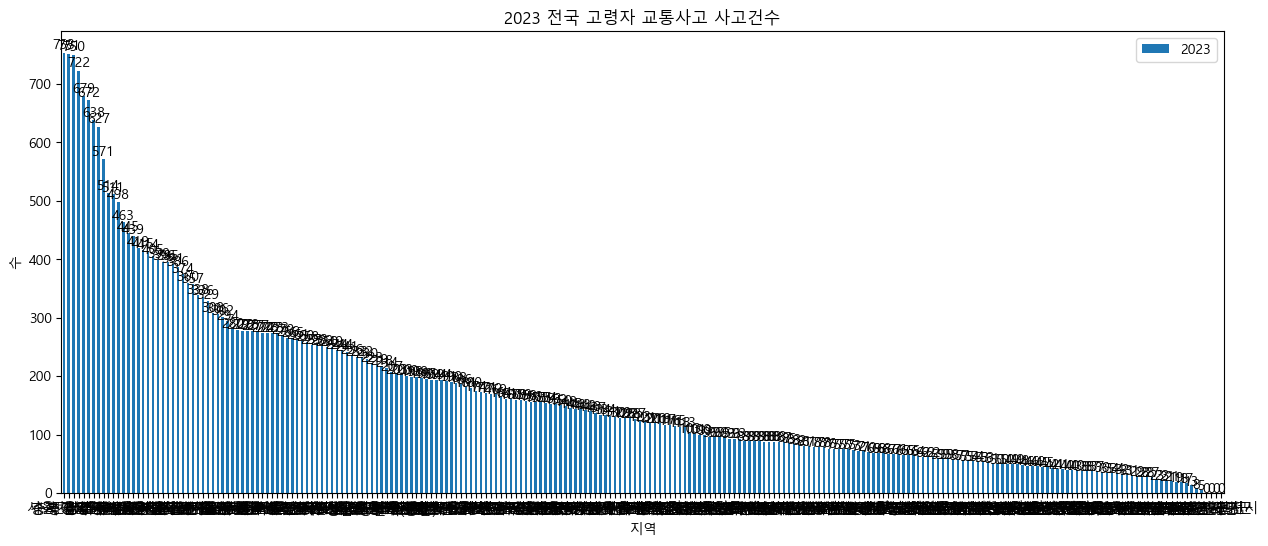

In [78]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
# AppleGothic
# Malgun Gothic
plt.rc("font", family="Malgun Gothic")

ax = df_25_setindex.plot(    
    kind="bar",
    title="2023 전국 고령자 교통사고 사고건수",
    figsize=(15, 6),
    width = 0.5
)
_ = plt.xticks(size = 10, rotation=0, ha="center")

plt.xlabel("지역")
plt.ylabel("수")

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    # print(p.get_bbox().bounds)
    ax.annotate("%i"%(height), (left+width/2, height*1.01), ha='center', size=10)

In [5]:
import pandas as pd
df_10 = pd.read_csv("rain.csv", encoding = 'EUC-KR')

In [6]:
df_10_drop = df_10[['area','count','rain', 'rain_count']]

In [7]:
df_10_drop.columns = ['지역', '고령운전자 사고건수', '강우량(mm)', '강우일수']

In [8]:
df_10_setindex = df_10_drop.set_index('지역')

In [9]:
df_10_setindex

,고령운전자 사고건수,강우량(mm),강우일수
지역,,,
서울 강남구,753,1598.8,109
충북 청주시,751,1805.6,104
경기 남양주시,750,1412.7,109
경기 오산시,722,1409.4,102
경기 여주시,679,1538.4,106
전남 진도군,672,1540.8,122
울산 동구,638,2172.0,106
경기 수원시,627,1409.4,102
경남 하동군,571,1938.2,110


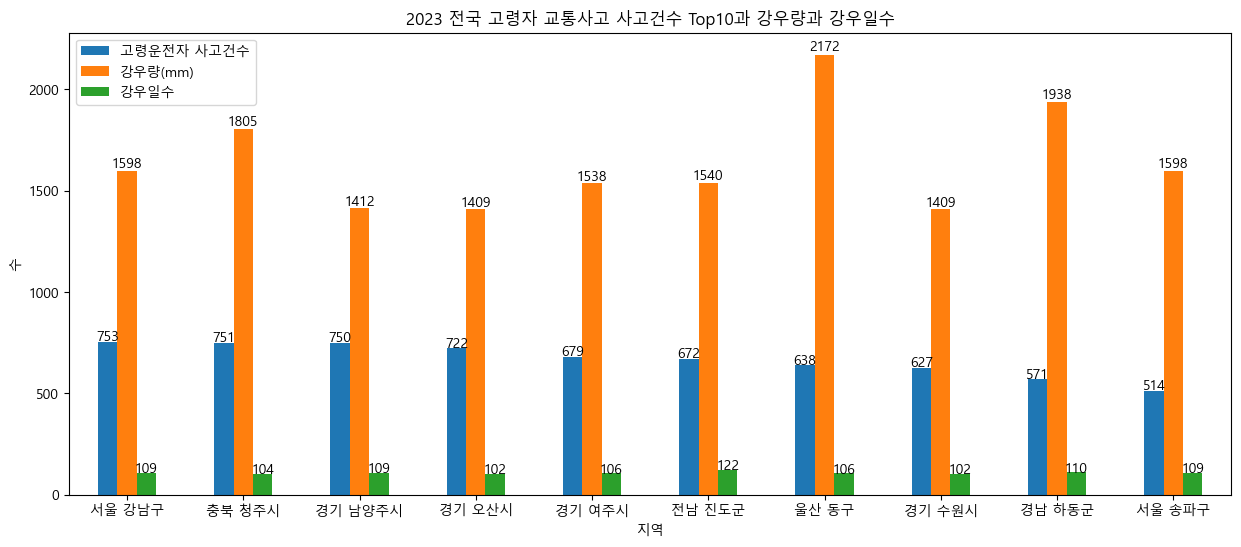

In [10]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
# AppleGothic
# Malgun Gothic
plt.rc("font", family="Malgun Gothic")

ax = df_10_setindex.plot(    
    kind="bar",
    title="2023 전국 고령자 교통사고 사고건수 Top10과 강우량과 강우일수",
    figsize=(15, 6),
    width = 0.5
)
_ = plt.xticks(size = 10, rotation=0, ha="center")

plt.xlabel("지역")
plt.ylabel("수")

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    # print(p.get_bbox().bounds)
    ax.annotate("%i"%(height), (left+width/2, height*1.01), ha='center', size=10)

In [318]:
df_11 = pd.read_csv("rain_2023.csv", encoding = 'EUC-KR')

In [323]:
df_11_drop = df_11[['지점정보','강수량(mm)']]

In [324]:
df_11_setindex = df_11_drop.set_index('지점정보')

In [327]:
df_11_sort = df_11_setindex.sort_values('강수량(mm)', ascending = False)

In [331]:
df_11_top10 = df_11_sort[:10]

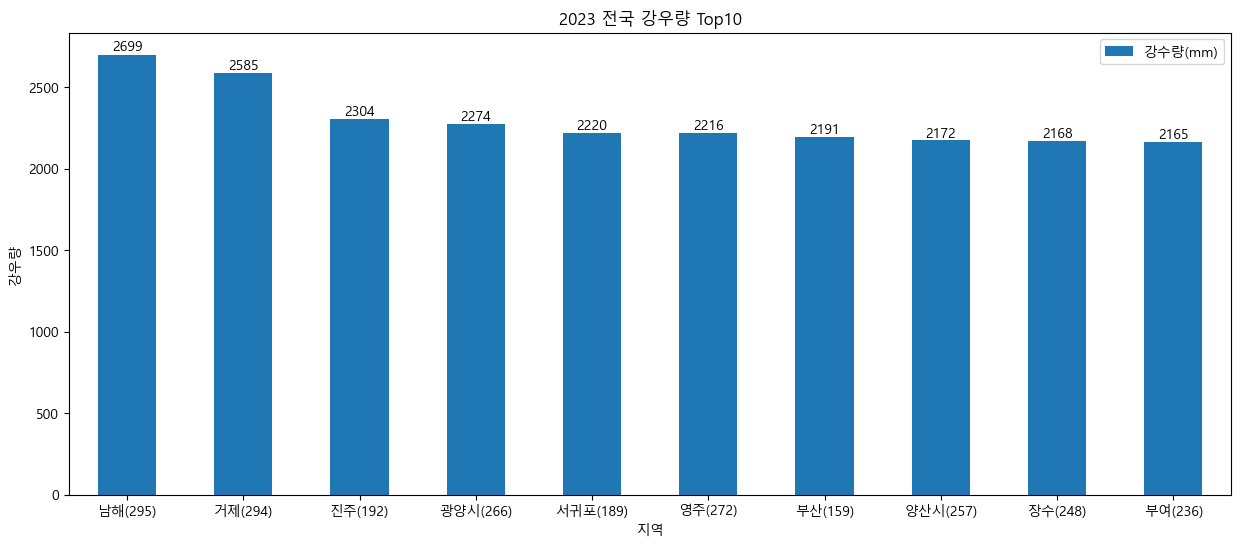

In [395]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
# AppleGothic
# Malgun Gothic
plt.rc("font", family="Malgun Gothic")

ax = df_11_top10.plot(    
    kind="bar",
    title="2023 전국 강우량 Top10",
    figsize=(15, 6),
    width = 0.5
)
_ = plt.xticks(size = 10, rotation=0, ha="center")

plt.xlabel("지역")
plt.ylabel("강우량")

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    # print(p.get_bbox().bounds)
    ax.annotate("%i"%(height), (left+width/2, height*1.01), ha='center', size=10)

In [343]:
df_12 = pd.read_csv("rain_count_2023.csv", encoding = 'EUC-KR')

In [347]:
df_12_drop = df_12[['지점정보','강수일수']]

In [348]:
df_12_setindex = df_12_drop.set_index('지점정보')

In [350]:
df_12_sort = df_12_setindex.sort_values('강수일수', ascending = False)

In [352]:
df_12_top10 = df_12_sort[:10]

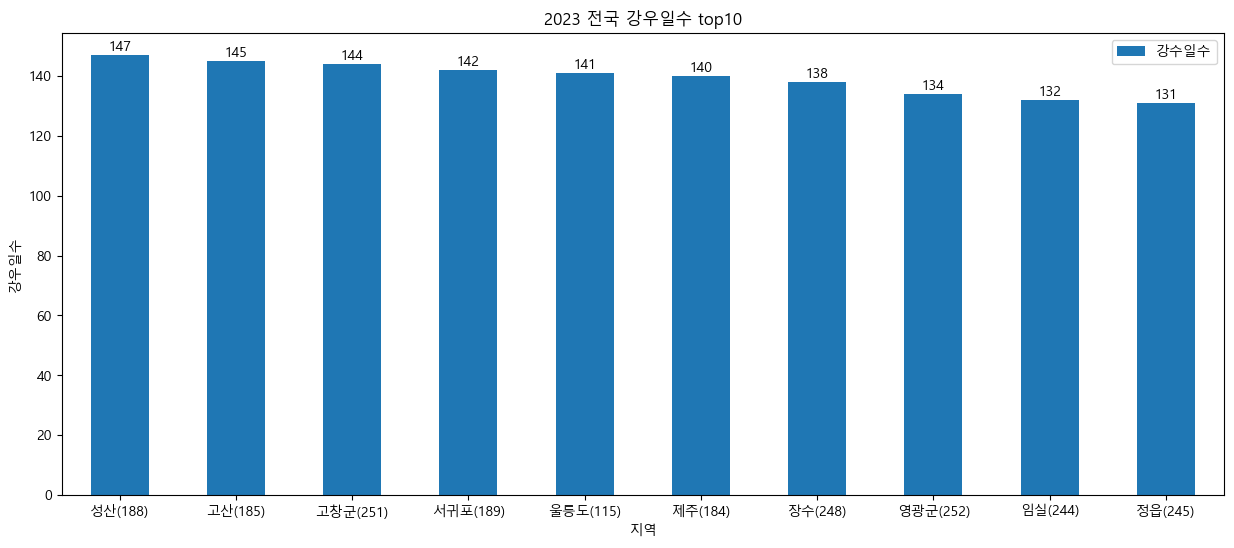

In [355]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
# AppleGothic
# Malgun Gothic
plt.rc("font", family="Malgun Gothic")

ax = df_12_top10.plot(    
    kind="bar",
    title="2023 전국 강우일수 top10",
    figsize=(15, 6),
    width = 0.5
)
_ = plt.xticks(size = 10, rotation=0, ha="center")

plt.xlabel("지역")
plt.ylabel("강우일수")

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    # print(p.get_bbox().bounds)
    ax.annotate("%i"%(height), (left+width/2, height*1.01), ha='center', size=10)

In [370]:
df_13_drop = df_9[['string_field_0', 'string_field_1','string_field_2','string_field_113']]

In [372]:
df_13_drop2 = df_13_drop.drop(0, axis=0)

In [375]:
df_13_drop3 = df_13_drop2.drop(1, axis=0)

In [377]:
df_13_drop3.columns = ['시구', '구군면', '구분', '2023']

In [386]:
df_13_drop3.to_csv("test2.csv")

In [392]:
df_14 = pd.read_csv("rain_old_age_last.csv", encoding = 'EUC-KR')

In [396]:
df_14_setindex = df_14.set_index('지역')

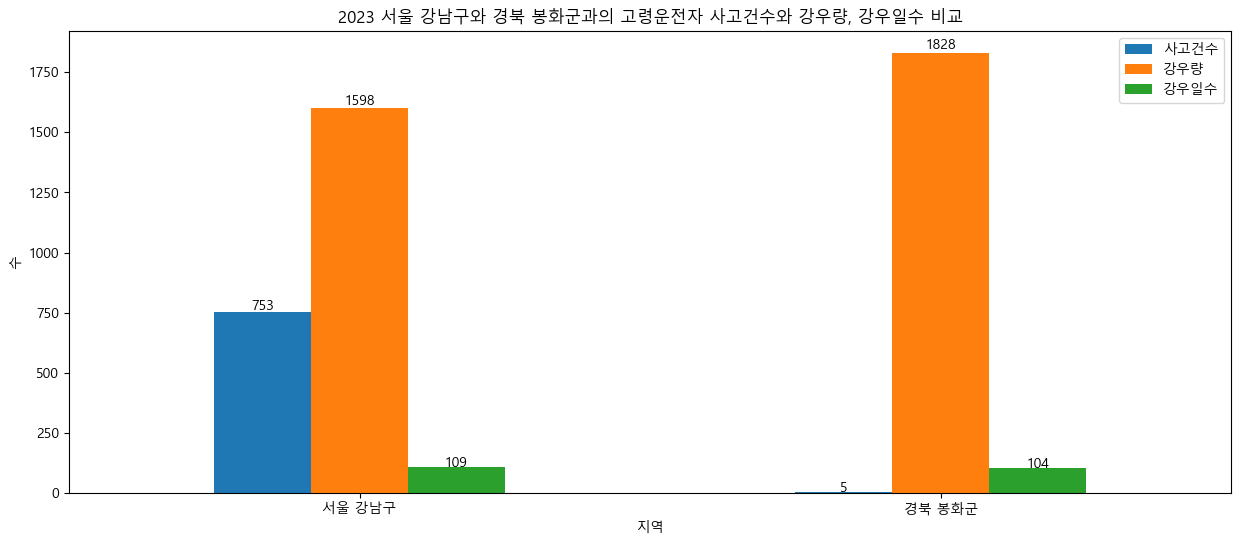

In [397]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
# AppleGothic
# Malgun Gothic
plt.rc("font", family="Malgun Gothic")

ax = df_14_setindex.plot(    
    kind="bar",
    title="2023 서울 강남구와 경북 봉화군과의 고령운전자 사고건수와 강우량, 강우일수 비교",
    figsize=(15, 6),
    width = 0.5
)
_ = plt.xticks(size = 10, rotation=0, ha="center")

plt.xlabel("지역")
plt.ylabel("수")

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    # print(p.get_bbox().bounds)
    ax.annotate("%i"%(height), (left+width/2, height*1.01), ha='center', size=10)

In [68]:
# 전체적인 사고가 줄어들고 있음 : 이유 - 정부의 적극적인 교통안전정책과 국민의 교통안전의식 향상
# 교통사고 감소를 위해 중앙부처, 지자체, 경찰청 및 교통관계기관에서는 보행자 중심의 교통체계 구축과 교통사고 위험지역에 대한 도로환경 개선, 교통안전정책 연구‧개발, 홍보와 캠페인 등 다양한 교통안전활동

# 음주운전 변동 폭이 크지 않고 꾸준하게 발생하고 있어 평소 각별한 주의가 필요
#한국건강증진개발원
# https://www.khepi.or.kr/acs/acsStat/result?menuId=-&tableGubun=DATA010401
# TAAS 교통사고 분석시스템에서 2022 2023 추가

In [69]:
# 2001년과 2021년에 각각 실시된「음주 후 운전여부를 결정하는 심리적 요인」조사 결과를 살펴보면, 두 조사 모두 ‘마신 술의 양이 적어서’라는 응답이 음주운전을 하게 되는 가장 큰 요인으로 작용한 것을 알 수 있다.
# 이 조사는 20년의 세월이 흐르고 세대가 바뀌어도 음주운전을 하는 이유가 크게 변하지 않았음을 단적으로 보여주고 있어, 소량이라도 술을 마신 후 음주운전의 위험성에 대한 지속적인 주의와 국민적 관심이 필요하다.

In [70]:
# 음주운전 교통사고를 요일별로 살펴보면 주로 금요일부터 평균 11,756건을 넘어서기 시작하여 토요일에는 14,715건으로 가장 많았고 일요일까지 평균 이상의 사고건수가 이어진다

In [ ]:
# “음주운전은 교통사고에 대한 경각심보다 운전자 자신의 편의를 우선할 때 하게 되는데, 음주 후 운전여부는 선택이 아닌 금지라는 확고한 인식이 필요하다.”며, “또한 이륜차, 전동킥보드 등도 음주 후에는 절대 운전해서는 안 된다.”고 강조했다.

In [ ]:
# 음주운전 교통사고를 낸 차종별로는 승용차가 77.5%로 월등히 많았고, 영업용인 화물차가 11.0%, 오토바이 등의 이륜차가 8.2% 순으로 많은 것으로 나타나 승용차 운전자들은 특별히 유의가 필요
# 연령대별로는 20대에서 50대가 전체사고의 86.8%를 차지하고 있으며, 각각의 연령대는 모두 20%대를 차지해 나이와 무관하게 절대 음주운전을 하지 않도록 해야 한다

In [20]:
import pandas as pd
df_15 = pd.read_csv("./system_know.csv", encoding = 'EUC-KR')

In [21]:
df_15

,내용,비율
0,잘 알고 있다.,51
1,이름은 들어본 적 있다.,38
2,전혀 모른다.,11


([<matplotlib.patches.Wedge at 0x1b6c7827a10>,
 [Text(-0.03455189711247168, 1.0994572144498982, '잘 알고 있다.'),
  Text(-0.3399188151951704, -1.046162128485022, '이름은 들어본 적 있다.'),
  Text(1.034968858555273, -0.3726116769785877, '전혀 모른다.')],
 [Text(-0.01884648933407546, 0.5997039351544898, '51.0%'),
  Text(-0.1854102628337293, -0.5706338882645574, '38.0%'),
  Text(0.5645284683028762, -0.20324273289741146, '11.0%')])

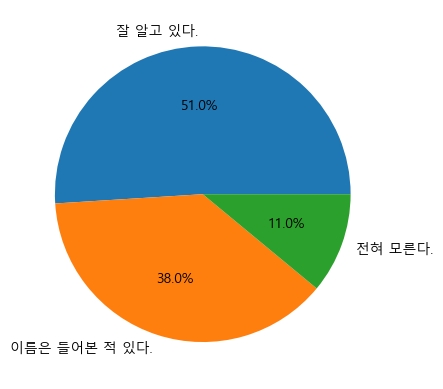

In [22]:
plt.pie(df_15['비율'], labels=df_15['내용'], autopct='%1.1f%%')

In [23]:
import pandas as pd
df_16 = pd.read_csv("./system_know_detail.csv", encoding = 'EUC-KR')

In [24]:
df_16

,나이,잘 알고 있다,이름은 들어본 적 있다,전혀 모른다
0,18~21세,32,37,31
1,30세,45,47,8
2,40대,46,44,10
3,50대,59,34,8
4,60~64세,60,34,6
5,65세이상,64,34,3


In [25]:
df_16_setindex = df_16.set_index('나이')

In [28]:
df_16_setindex

,잘 알고 있다,이름은 들어본 적 있다,전혀 모른다
나이,,,
18~21세,32,37,31
30세,45,47,8
40대,46,44,10
50대,59,34,8
60~64세,60,34,6
65세이상,64,34,3


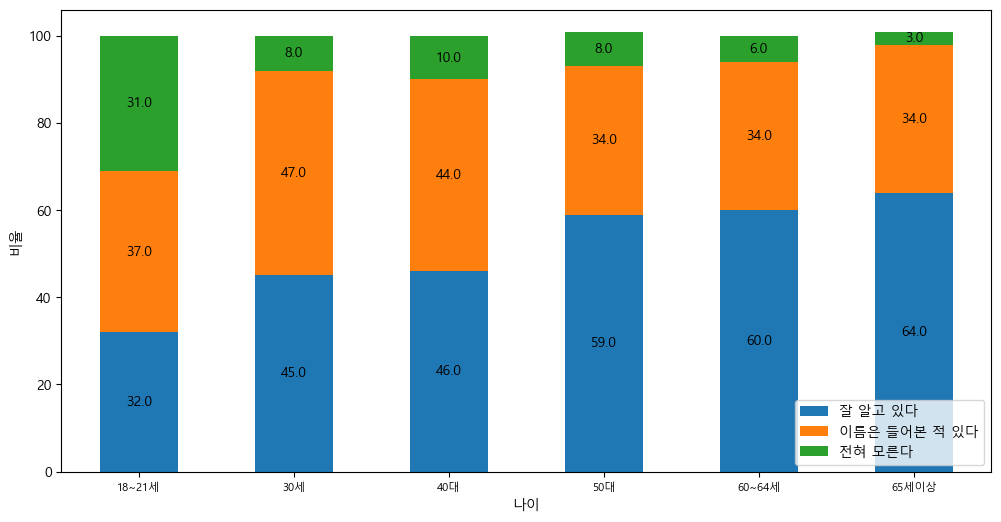

In [31]:
ax = df_16_setindex.plot(
        kind="bar",
        figsize=(12, 6),
        stacked = True
)
plt.xlabel("나이")
plt.ylabel("비율")

_ = plt.xticks(size = 8, rotation=0, ha="center")

for c in ax.containers:
    labels = [ x.get_height() for x in c ]
    ax.bar_label(c, labels=labels, label_type='center')

In [46]:
df_17 = pd.read_csv("./return_count.csv", encoding = 'EUC-KR')

In [47]:
df_17

,내용,퍼센트
0,반납 대상 나이가 되어 면허를 반납하겠다.,1
1,향후 번납 대상 나이가 되면 반납할 의향이 있다.,73
2,반납 하지 않을 것이다.,26


In [48]:
df_17_setindex = df_17.set_index('내용')

([<matplotlib.patches.Wedge at 0x14014b7eb10>,
 [Text(1.0994572163463554, 0.034551836766276656, '반납 대상 나이가 되어 면허를 반납하겠다.'),
  Text(-0.7778174639428924, 0.7778174546675122, '향후 번납 대상 나이가 되면 반납할 의향이 있다.'),
  Text(0.7530020723235409, -0.8018652499494245, '반납 하지 않을 것이다.')],
 [Text(0.599703936188921, 0.01884645641796908, '1.0%'),
  Text(-0.4242640712415776, 0.4242640661822793, '73.0%'),
  Text(0.4107284030855677, -0.43738104542695877, '26.0%')])

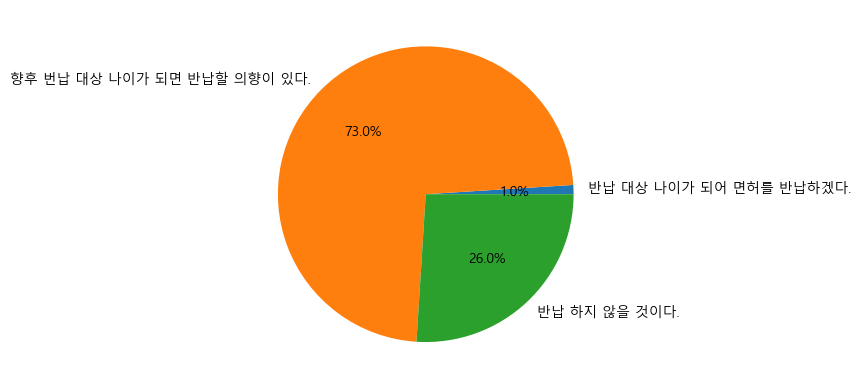

In [51]:
plt.pie(df_17['퍼센트'], labels=df_17['내용'], autopct='%1.1f%%')

In [2]:
import pandas as pd
df_18 = pd.read_csv("./test_ok.csv", encoding = 'EUC-KR')

In [3]:
df_18_setindex = df_18.set_index('내용')

([<matplotlib.patches.Wedge at 0x1b6c540e750>,
 [Text(0.6741977473438563, 0.8691705226688662, '가려낼 수 있다'),
  Text(-1.0994572189808232, 0.03455175293606211, '가려낼 수 없다'),
  Text(0.6465640158668551, -0.8899185206445168, '모르겠다')],
 [Text(0.3677442258239216, 0.47409301236483603, '29.0%'),
  Text(-0.5997039376259035, 0.018846410692397512, '41.0%'),
  Text(0.3526712813819209, -0.4854101021697364, '30.0%')])

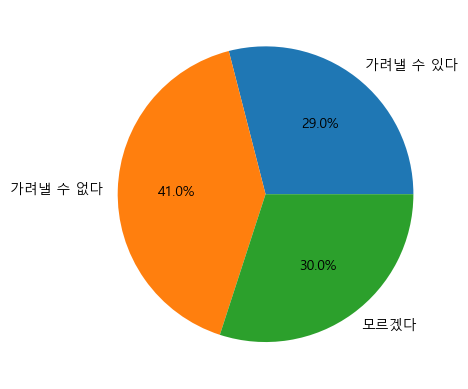

In [7]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
# AppleGothic
# Malgun Gothic
plt.rc("font", family="Malgun Gothic")

plt.pie(df_18['비율'], labels=df_18['내용'], autopct='%1.1f%%')

In [10]:
df_19 = pd.read_csv("./if_agree.csv", encoding = 'EUC-KR')

In [11]:
df_19

,내용,동의한다.,동의하지 않는다.
0,첨단 안전 장치 부착,81,17
1,야간 운전 금지,67,31
2,최고 속도 제한,61,36
3,고속도로 운전 금지,43,54


In [12]:
df_19_setindex = df_19.set_index('내용')

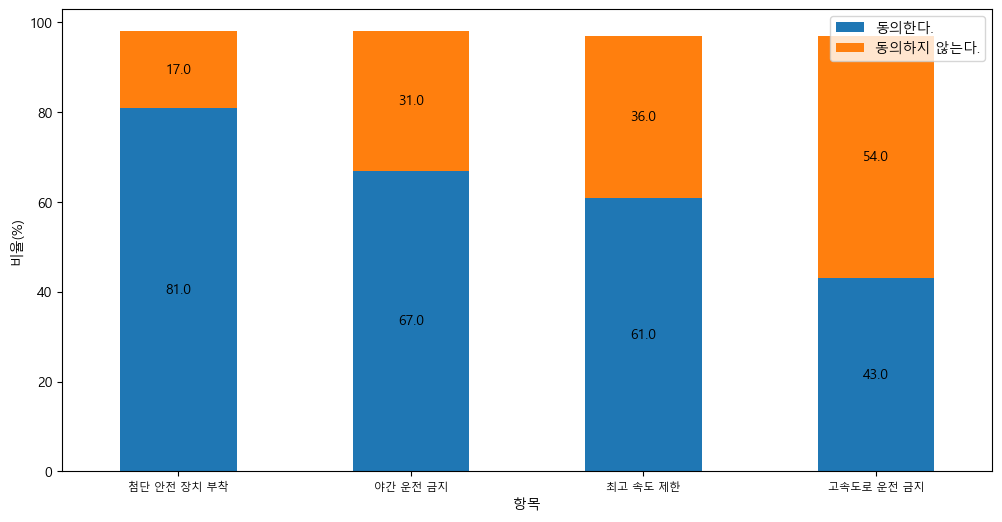

In [18]:
ax = df_19_setindex.plot(
        kind="bar",
        figsize=(12, 6),
        stacked = True
)
_ = plt.xticks(size = 8, rotation=0, ha="center")

plt.xlabel("항목")
plt.ylabel("비율(%)")

for c in ax.containers:
    labels = [ x.get_height() for x in c ]
    ax.bar_label(c, labels=labels, label_type='center')

In [4]:
import pandas as pd
df_20= pd.read_csv("./no_break.csv", encoding = 'EUC-KR')

In [5]:
df_20

,나이,비율
0,80대,0.8
1,70대,11.6
2,60대,30.8
3,50대,27.3
4,40대,20.2
5,30대,7.6
6,20대,1.8


([<matplotlib.patches.Wedge at 0x22b1272b020>,
 [Text(1.099653301925504, 0.027615495004376274, '80대'),
  Text(1.0069488006481728, 0.44277998246669503, '70대'),
  Text(-0.1906353937299485, 1.083355041829514, '60대'),
  Text(-1.0013108628452183, -0.4553861613489858, '50대'),
  Text(0.3738789283357644, -1.0345117432617672, '40대'),
  Text(1.0327407459399471, -0.3787433849922689, '30대'),
  Text(1.0982452760918981, -0.0621072744678971, '20대')],
 [Text(0.5998108919593657, 0.015062997275114329, '0.8%'),
  Text(0.5492448003535487, 0.2415163540727427, '11.6%'),
  Text(-0.10398294203451736, 0.5909209319070075, '30.8%'),
  Text(-0.5461695615519372, -0.2483924516449013, '27.3%'),
  Text(0.20393396091041693, -0.5642791326882366, '20.2%'),
  Text(0.5633131341490619, -0.20658730090487393, '7.6%'),
  Text(0.599042877868308, -0.0338766951643075, '1.8%')])

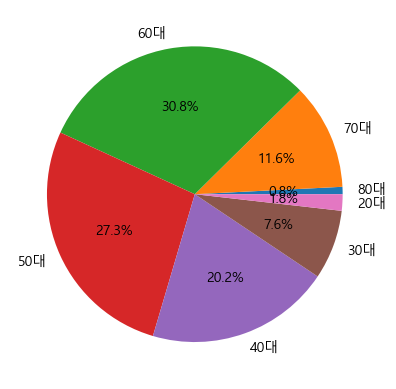

In [6]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
# AppleGothic
# Malgun Gothic
plt.rc("font", family="Malgun Gothic")

plt.pie(df_20['비율'], labels=df_20['나이'], autopct='%1.1f%%')

In [1]:
import pandas as pd
df_21 = pd.read_csv("./people.csv", encoding = 'EUC-KR')

In [2]:
df_21_drop = df_21[['Unnamed: 0','2022']]

In [3]:
df_21_drop.columns = [['지역','2022']]

In [4]:
df_21_drop2 = df_21_drop.iloc[1:18]

In [8]:
df_21_drop2

,지역,2022
1,서울,9421
2,부산,3303
3,대구,2372
4,인천,2975
5,광주,1470
6,대전,1472
7,울산,1114
8,세종,380
9,경기,13690
10,강원,1527


In [9]:
df_21_setindex = df_21_drop2.set_index("지역")

In [10]:
df_21_setindex

,2022
지역,
"(서울,)",9421
"(부산,)",3303
"(대구,)",2372
"(인천,)",2975
"(광주,)",1470
"(대전,)",1472
"(울산,)",1114
"(세종,)",380
"(경기,)",13690


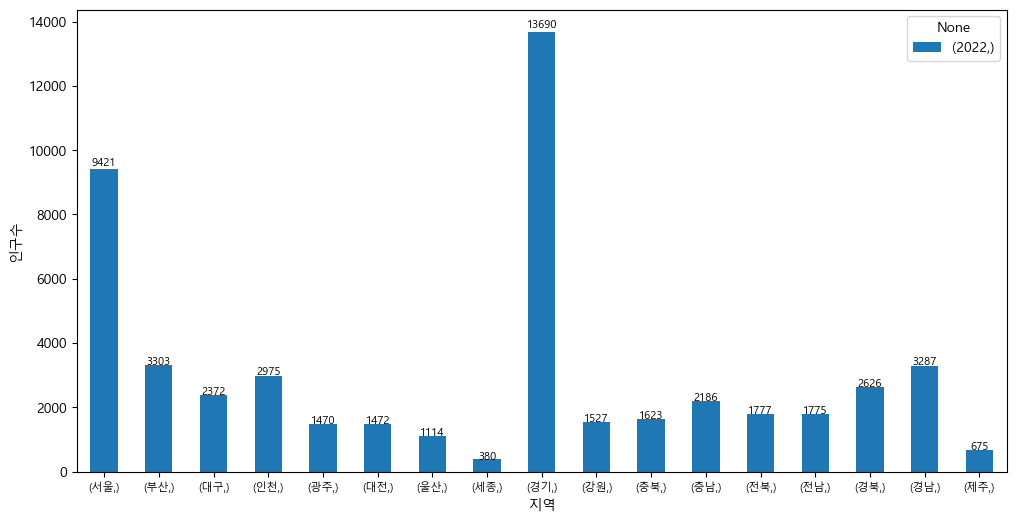

In [18]:
from matplotlib import pyplot as plt

from matplotlib import font_manager, rc

# AppleGothic
# Malgun Gothic
plt.rc("font", family="Malgun Gothic")

ax = df_21_setindex.plot(
        kind="bar",
        figsize=(12, 6)
)
_ = plt.xticks(size = 8, rotation=0, ha="center")

plt.xlabel("지역")
plt.ylabel("인구수")

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    # print(p.get_bbox().bounds)
    ax.annotate("%i"%(height), (left+width/2, height*1.01), ha='center', size=8)

In [11]:
df_21_drop_2023 = df_21[['Unnamed: 0','2023']]

In [12]:
df_21_drop_2023.columns = [['지역','2023']]

In [13]:
df_21_drop2_2023 = df_21_drop_2023.iloc[1:18]

In [14]:
df_21_drop2_2023

,지역,2023
1,서울,9400
2,부산,3284
3,대구,2360
4,인천,3009
5,광주,1463
6,대전,1474
7,울산,1106
8,세종,387
9,경기,13781
10,강원,1525


In [15]:
df_21_setindex_2023 = df_21_drop2_2023.set_index("지역")

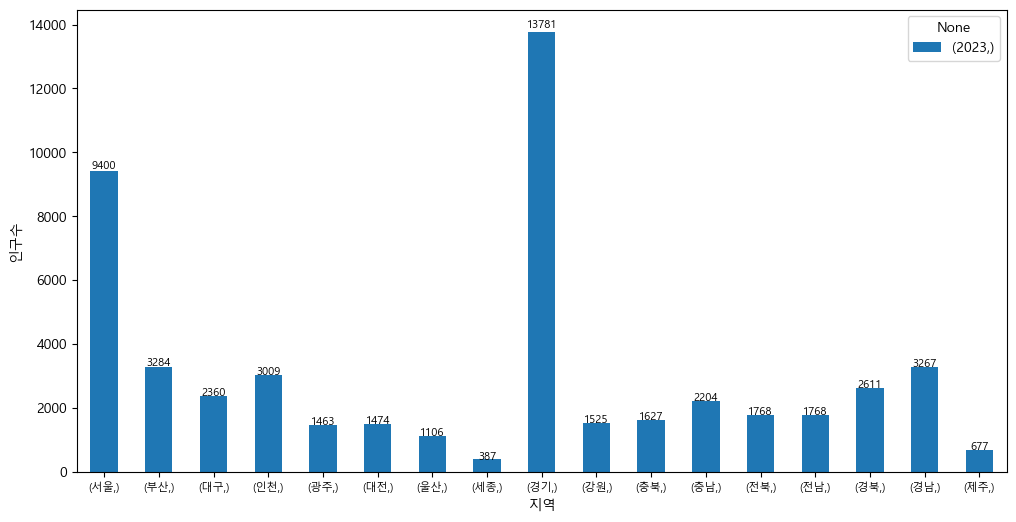

In [17]:
from matplotlib import pyplot as plt

from matplotlib import font_manager, rc

# AppleGothic
# Malgun Gothic
plt.rc("font", family="Malgun Gothic")

ax = df_21_setindex_2023.plot(
        kind="bar",
        figsize=(12, 6)
)
_ = plt.xticks(size = 8, rotation=0, ha="center")

plt.xlabel("지역")
plt.ylabel("인구수")

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    # print(p.get_bbox().bounds)
    ax.annotate("%i"%(height), (left+width/2, height*1.01), ha='center', size=8)